# Earthquake risk in Greece

This project is quite different from a software development task.

Don't hesitate to contact us, if you have any doubts on what is asked or if you encounter error will using the notebook.

In [1]:
%reload_ext autoreload
%autoreload 2

## Constraints

+ 🚨 Only cells with the comment `# NOTE: Fill me!` should be filled
+ 🚨 Notebook should be saved and commited **with** outputs for the submission


+ ⚠️ The solution only requires packages listed in the `requirements/requirements.txt`
+ ⚠️ Unit tests should be favored when asked to write tests 
+ ⚠️ Tests must automatically be detected running `pytest`
+ ⚠️ Requested method signature should be inferred from this notebook


## Note

+ The `assert` statements in the notebook are here to guide the project.
However, successful `assert` statements does not guaranty that your code is correct.

## Setup

In a Python >= 3.8 virtual env, run:

In [2]:
%pip install -r ../requirements/requirements.txt
%pip install --no-deps -e ..

Note: you may need to restart the kernel to use updated packages.
Obtaining file:///c:/Users/giuliano/Desktop/Descartes%20underwriting/software-engineer-technical-test
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for earthquakes (pyproject.toml): started
  Building editable for earthquakes (pyproject.toml): finished with status 'done'
  Created wheel for earthquakes: filename=earthquakes-0.0.dev0-0.editable-py3-none-any.whl size=2031 sha256=ce440cda0ab5868165d819aedc127a5c7bb4bab144d3a896208e96140a27e705
  Stored in directo

## Tests

In [3]:
original_dir = %pwd
%cd ..
!pytest
%cd $original_dir

c:\Users\giuliano\Desktop\Descartes underwriting\software-engineer-technical-test
============================= test session starts =============================
platform win32 -- Python 3.14.3, pytest-9.0.2, pluggy-1.6.0
rootdir: c:\Users\giuliano\Desktop\Descartes underwriting\software-engineer-technical-test
collected 7 items

tests\src\earthquakes\test_tools.py ...                                  [ 42%]
tests\src\earthquakes\test_usgs_api.py ....                              [100%]

============================== 7 passed in 0.78s ==============================
c:\Users\giuliano\Desktop\Descartes underwriting\software-engineer-technical-test\notebook


---

# Context

A client asks for an insurance of their asset, located at `(35.025, 25.763)` in Greece.

The client wishes to receive a payout under the following conditions:

+ earthquake of magnitude `4.5` or higher within `10km`: full payout
+ earthquake of magnitude `5.5` or higher within `50km`: `75%` payout
+ earthquake of magnitude `6.5` or higher within `200km`: `50%` payout

In the event of aftershocks, a payout can only occur once a year using the maximal value.

## Example

If in the same year:

* an earthquake of magnitude `6.8` occurs within `200km`
* **and** an aftershock of magnitude `5.8` occurs within `50km`

the client receives a `75%` payout, and not a `125%` payout.

In [4]:
! where python

c:\Users\giuliano\AppData\Local\Python\pythoncore-3.14-64\python.exe
C:\Users\giuliano\AppData\Local\Python\bin\python.exe


In [5]:
import numpy as np
import pandas as pd
from datetime import datetime

from earthquakes.tools import (
    DISTANCE_COLUMN,
    LATITUDE_COLUMN,
    LONGITUDE_COLUMN,
) 

# Earthquake data

The US Geological Service (USGS) provides CSV data through their [API](https://earthquake.usgs.gov/fdsnws/event/1/).

Use it to retrieve earthquake information.

In the module `earthquakes.usgs_api`:
+ Implement the function `get_earthquake_data`,
+ The function will retrieve the earthquake data of the area of interest for the past 200 years,
+ The implementation must use the `urllib` python package,
+ The API request url must be build in a dedicated function `build_api_url`,
+ Tests should be provided for `build_api_url`.

Note: Earthquakes after the 21-10-2021 should not be considered.

In [6]:
from earthquakes.usgs_api import get_earthquake_data

In [7]:
# NOTE: Fill me!

latitude = 35.025 #degrees
longitude = 25.763 #degrees
radius = 200 # Kilometers
minimum_magnitude = 4.5

In [8]:
# NOTE: This request may take significant time (>10s)

earthquake_data = get_earthquake_data(
    latitude=latitude,
    longitude=longitude,
    radius=radius,
    minimum_magnitude=minimum_magnitude,
    end_date=datetime(year=2021, month=10, day=21)
)

In [9]:
assert isinstance(earthquake_data, pd.DataFrame)
assert len(earthquake_data) == 763

## Warning

The next test may fail because USGS regularly updates their earthquake database.

The dataframe obtained should over be similar to that presented bellow.

Please contact us if there is an error.

In [10]:
expected_earthquake_data = pd.DataFrame([
        ["2021-10-12T09:24:05.099Z", 35.1691, 26.2152, 20.0, 6.4, "mww", np.nan, 19.0, 0.860, 0.46,"us", "us6000ftxu", "2023-08-12T13:32:34.542Z", "4 km SW of Palekastro, Greece", "earthquake", 6.1, 1.8, 0.048, 42.0, "reviewed", "us", "us"],
        ["2021-10-03T14:31:27.622Z", 35.1442, 25.2375, 10.0, 4.6, "mb", np.nan, 119.0, 0.318, 0.64, "us", "us6000fsp1", "2021-12-10T21:14:19.040Z", "2 km W of Arkalochóri, Greece", "earthquake", 5.0, 1.9, 0.165, 13.0, "reviewed", "us", "us"],
        ["2021-09-29T11:54:48.885Z", 35.0268, 25.1561, 10.0, 4.6, "mb", np.nan, 69.0, 0.339, 0.83, "us", "us6000fq3y", "2021-12-04T14:27:58.040Z", "2 km N of Pýrgos, Greece", "earthquake", 5.1, 1.3, 0.068, 64.0, "reviewed", "us", "us"],
        ["2021-09-28T15:13:16.867Z", 35.2054, 25.2791, 10.0, 4.7, "mb", np.nan, 58.0, 0.329, 0.70, "us", "us7000ff84", "2021-12-04T14:30:09.040Z", "1 km N of Thrapsanón, Greece", "earthquake", 6.9, 1.8, 0.067, 73.0, "reviewed", "us", "us"],
        ["2021-09-28T04:48:08.650Z", 35.0817, 25.2018, 10.0, 5.3, "mww", np.nan, 43.0, 0.328, 0.94, "us", "us7000ff36", "2021-12-04T14:30:04.040Z", "9 km SW of Arkalochóri, Greece", "earthquake", 4.5, 1.7, 0.046, 45.0, "reviewed", "us", "us"],
    ],
    columns=['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']
)

In [11]:
expected_earthquake_data = pd.DataFrame([
        ["2021-10-12T09:24:05.099Z", 35.1691, 26.2152, 20.0, 6.4, "mww", np.nan, 19.0, 0.860, 0.46,"us", "us6000ftxu", "2025-12-22T22:17:40.432Z", "4 km SW of Palekastro, Greece", "earthquake", None, None, None, None, "reviewed", None, None],
        ["2021-10-03T14:31:27.622Z", 35.1442, 25.2375, 10.0, 4.6, "mb", np.nan, 119.0, 0.318, 0.64, "us", "us6000fsp1", "2021-12-10T21:14:19.040Z", "2 km W of Arkalochóri, Greece", "earthquake", None, None, None, None, "reviewed", None, None],
        ["2021-09-29T11:54:48.885Z", 35.0268, 25.1561, 10.0, 4.6, "mb", np.nan, 69.0, 0.339, 0.83, "us", "us6000fq3y", "2021-12-04T14:27:58.040Z", "2 km N of Pýrgos, Greece", "earthquake", None, None, None, None, "reviewed", None, None],
        ["2021-09-28T15:13:16.867Z", 35.2054, 25.2791, 10.0, 4.7, "mb", np.nan, 58.0, 0.329, 0.70, "us", "us7000ff84", "2021-12-04T14:30:09.040Z", "1 km N of Thrapsanón, Greece", "earthquake", None, None, None, None, "reviewed", None, None],
        ["2021-09-28T04:48:08.650Z", 35.0817, 25.2018, 10.0, 5.3, "mww", np.nan, 43.0, 0.328, 0.94, "us", "us7000ff36", "2025-12-22T22:24:09.757Z", "9 km SW of Arkalochóri, Greece", "earthquake", None, None, None, None, "reviewed", None, None],
    ],
    columns=['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource']
)

In [12]:
earthquake_data_sample = earthquake_data[
    earthquake_data["time"].isin(expected_earthquake_data["time"])
]

pd.testing.assert_frame_equal(earthquake_data_sample, expected_earthquake_data)

# Distance

We wish to compute the the historical payouts (i.e. the payouts that would have occurred for the past 200 years).

To compute the historical payouts, we need to know the distance between each earthquake and our client's asset.

The distance between two points on a sphere is the [Haversine distance](https://en.wikipedia.org/wiki/Haversine_formula). In the module `eathquakes.tools`:
- Implement and test the function `get_haversine_distance`,
- Use `earthquakes.tools.EARTH_RADIUS` (6378km) as an approximation of the radius of Earth.

In [13]:
from earthquakes.tools import get_haversine_distance

distances = get_haversine_distance(earthquake_data[LATITUDE_COLUMN], earthquake_data[LONGITUDE_COLUMN], latitude, longitude)

earthquake_data[DISTANCE_COLUMN] = distances

print(earthquake_data[DISTANCE_COLUMN])

0       44.198651
1       49.673412
2       55.323314
3       48.422808
4       51.527937
          ...    
758    166.990912
759     14.320642
760    182.831194
761    171.374913
762    113.488858
Name: distance, Length: 763, dtype: float64


## Historical payouts and burning costs

### Payout

The historical payouts are a map `year -> payout in %`.

eg: `1950: 50` for a payout of `50%` in 1950.

Payouts are NOT given per event, but per year.

This map can take the form of a python `dict` or of a pandas `Series`. 

### Burning cost

The `burning cost` is the average of payouts over a time range.

In this project, the burning cost should be expressed in `%`. 

### Payout structure

The payout structure is:

| Radius | Magnitude | Payout |
|--------|-----------|--------|
| 10km   | 4.5       | 100 %  |
| 50km   | 5.5       |  75 %  |
| 200km  | 6.5       |  50 %  |

Even though multiple events can happen in a given year, clients can only receive one payout.

In the module `earthquakes.tools`:
+ Implement the functions `compute_payouts` and `compute_burning_cost`,
+ Tests for these functions are not required.

### Example

A payout `{1950: 50, 1992: 75}` means that we would have paid our client
+ in 1950, for `50%` of the insured amount (called 'limit')
+ in 1992, for `75%` of the limit

The burning cost over the `1922-2021` period would be `1.25%`.

The burning cost over the `1972-2021` period would be `1.5%`.

In [14]:
from earthquakes.tools import compute_payouts, compute_burning_cost

In [15]:
# NOTE: Fill me!

payout_structure = [
    {
        "radius": 10,
        "magnitude": 4.5,
        "payout": 100,
    },
    {
        "radius": 50,
        "magnitude": 5.5,
        "payout": 75,
    },
    {
        "radius": 200,
        "magnitude": 6.5,
        "payout": 50,
    },
]

In [16]:
payouts = compute_payouts(earthquake_data[['time', 'mag', 'depth']], payout_structure)
print(len(payouts))
print(payouts.keys())
print(payouts.values())

101
dict_keys([1906, 1908, 1910, 1911, 1913, 1915, 1917, 1918, 1919, 1920, 1922, 1923, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1942, 1944, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1962, 1964, 1965, 1966, 1967, 1968, 1969, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
dict_values([0.0, 75.0, 75.0, 75.0, 75.0, 75.0, 0.0, 75.0, 75.0, 75.0, 75.0, 75.0, 0.0, 75.0, 0.0, 0.0, 75.0, 0.0, 75.0, 75.0, 75.0, 0.0, 75.0, 75.0, 75.0, 0.0, 75.0, 75.0, 0.0, 75.0, 0.0, 75.0, 0.0, 0.0, 0.0, 75.0, 75.0, 0.0, 0.0, 75.0, 75.0, 75.0, 75.0, 75.0, 0.0, 0.0, 0.0, 0.0, 75.0, 75.0, 0.0, 0.0, 75.0, 0.0, 0.0, 0.0, 0.0, 0.0, 75.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 100.0

In [17]:
# Depending on the return type of compute_payouts, the following line needs to be adjusted.
# - pd.Series:
# payout_values = np.array(payouts.values)
# - dict:
payout_values = np.array(list(payouts.values()))

assert np.max(payout_values) > 1
assert np.max(payout_values) <= 100

In [18]:
burning_cost = compute_burning_cost(payouts, start_year=1525, end_year=2021)

In [19]:
np.testing.assert_allclose(burning_cost, 10.71, atol=1e-2)

In [20]:
import matplotlib.pyplot as plt

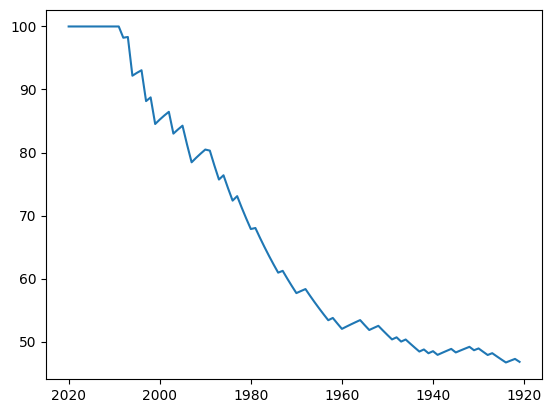

In [21]:
years = range(1921, 2021)
plt.plot(
    years, 
    [
        compute_burning_cost(payouts, start_year=start_year, end_year=2021) 
        for start_year in years
    ]
)
plt.gca().invert_xaxis()

# Large asset portfolio - async requests

Our client also whishes to cover a large amount of properties all over Europe.

In order to speed-up the requests to the USGS API, in the module `earthquakes.usgs_api`:
- Implement the `async` function `get_earthquake_data_for_multiple_locations`,
- The implementation should use the `asyncio` and `aiohttp` libraries,
- The solution should re-use some of the functions already written,
- Tests are not required for any of the functions.

Note: it is possible that the notebook autoreload feature doesn't work for `async` functions - a kernel restart may be necessary after each modifications.

In [22]:
import numpy as np
import pandas as pd
from datetime import datetime

from earthquakes.tools import (
    LATITUDE_COLUMN,
    LONGITUDE_COLUMN,
)

In [23]:
number_of_assets = 10
# NOTE: limiting to number of assets so that the query doesn't take too long.

In [24]:
random_state = np.random.RandomState(0)

random_values = random_state.random(2*number_of_assets)

latitudes = random_values[::2] * 20 + 35.0
longitudes = random_values[1::2] * 25 + 3.0

In [25]:
from earthquakes.usgs_api import get_earthquake_data_for_multiple_locations

In [26]:
# NOTE: Fill me!

assets = list(zip(latitudes.tolist(), longitudes.tolist()))
print(assets)

[(45.97627007854649, 20.879734159310487), (47.05526752143288, 16.622079574922424), (43.47309598677809, 19.147352826666403), (43.75174422525385, 25.294325019551994), (54.27325521002059, 12.586037970644442), (50.83450076165329, 16.22237299382261), (46.360891221878646, 26.139915957316525), (36.42072116395774, 5.178232492538518), (35.40436794880652, 23.81549613869845), (50.56313501899701, 24.750303706170477)]


In [27]:
# NOTE: This request may take significant time (>10s)
earthquake_data = await get_earthquake_data_for_multiple_locations(  # type: ignore
    assets, 
    radius=200, 
    minimum_magnitude=4.5, 
    end_date=datetime(year=2021, month=10, day=21)
)

In [28]:
assert isinstance(earthquake_data, pd.DataFrame)
print(earthquake_data)
assert len(earthquake_data) == 1181


                          time  latitude  longitude  depth   mag magType  \
0     2013-09-08T13:22:12.630Z   45.6097    22.8657   5.00  4.60      mb   
1     2002-08-02T09:37:18.220Z   44.7110    21.6200  10.00  4.50      mb   
2     2002-05-24T20:42:26.770Z   44.7610    21.6110  10.00  4.70      mb   
3     1996-03-24T09:13:28.030Z   45.6230    21.0230  22.60  4.80      mb   
4     1994-10-13T23:31:27.510Z   45.4930    21.0040  10.00  4.70      mb   
...                        ...       ...        ...    ...   ...     ...   
1176  1908-06-23T14:14:13.520Z   36.6560    24.2240  15.00  5.45      mw   
1177  1908-05-17T12:30:50.780Z   34.9870    23.8840  35.00  6.06      mw   
1178  1906-06-17T01:13:17.920Z   34.5540    24.6620  15.00  5.34      mw   
1179  1903-08-11T04:33:35.000Z   36.0000    23.0000  80.00  7.90      ms   
1180  2021-09-23T03:17:58.019Z   48.9703    25.9793  15.84  4.50      mb   

        nst   gap   dmin   rms  ...        type horizontalError depthError  \
0       N